# SuperMarket Clustering Task
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis (EDA)

In [2]:
# Read Data
sup = pd.read_csv('/Users/mohammad/Downloads/ECommerce_consumer behaviour.csv')
sup

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


__Supermarket consumer behaviour__ dataset consists of 2019501 Rows & 12 Columns :
* order_id – (A unique number to identity the order)
* user_id - (A unique number to identify the user)
* order_number – (Number of the order)
* order_dow – (Day of the Week the order was made)
* order_hour_of_day – (Time of the order)
* days_since_prior_order - (History of the order)
* product_id – (Id of the product)
* add_to_cart_order – (Number of items added to cart)
* reordered – (If the reorder took place)
* department_id - (Unique number allocated to each department)
* department – (Names of the departments)
* product_name – (Name of the products)

In [3]:
sup.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [4]:
sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [5]:
sup.duplicated().sum()

0

In [6]:
sup.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [7]:
# Check for missing values
sup.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
imputer = IterativeImputer(random_state=42)
sup_handle_missing_value = imputer.fit_transform(sup.loc[:, 'order_id':'department_id'])
sup_imputed = pd.concat([pd.DataFrame(sup_handle_missing_value), sup[['department', 'product_name']]], axis=1)

In [10]:
sup_imputed.columns = sup.columns
sup_imputed

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083.0,49125.0,1.0,2.0,18.0,14.501533,17.0,1.0,0.0,13.0,pantry,baking ingredients
1,2425083.0,49125.0,1.0,2.0,18.0,14.651952,91.0,2.0,0.0,16.0,dairy eggs,soy lactosefree
2,2425083.0,49125.0,1.0,2.0,18.0,14.627221,36.0,3.0,0.0,16.0,dairy eggs,butter
3,2425083.0,49125.0,1.0,2.0,18.0,14.788901,83.0,4.0,0.0,4.0,produce,fresh vegetables
4,2425083.0,49125.0,1.0,2.0,18.0,14.843111,83.0,5.0,0.0,4.0,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742.0,199430.0,16.0,3.0,18.0,5.000000,83.0,8.0,0.0,4.0,produce,fresh vegetables
2019497,458285.0,128787.0,42.0,2.0,19.0,3.000000,115.0,1.0,1.0,7.0,beverages,water seltzer sparkling water
2019498,458285.0,128787.0,42.0,2.0,19.0,3.000000,32.0,2.0,1.0,4.0,produce,packaged produce
2019499,458285.0,128787.0,42.0,2.0,19.0,3.000000,32.0,3.0,1.0,4.0,produce,packaged produce


In [11]:
sup_imputed['days_since_prior_order'] = sup_imputed['days_since_prior_order'].astype(np.int64)

In [12]:
sup_imputed

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083.0,49125.0,1.0,2.0,18.0,14,17.0,1.0,0.0,13.0,pantry,baking ingredients
1,2425083.0,49125.0,1.0,2.0,18.0,14,91.0,2.0,0.0,16.0,dairy eggs,soy lactosefree
2,2425083.0,49125.0,1.0,2.0,18.0,14,36.0,3.0,0.0,16.0,dairy eggs,butter
3,2425083.0,49125.0,1.0,2.0,18.0,14,83.0,4.0,0.0,4.0,produce,fresh vegetables
4,2425083.0,49125.0,1.0,2.0,18.0,14,83.0,5.0,0.0,4.0,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742.0,199430.0,16.0,3.0,18.0,5,83.0,8.0,0.0,4.0,produce,fresh vegetables
2019497,458285.0,128787.0,42.0,2.0,19.0,3,115.0,1.0,1.0,7.0,beverages,water seltzer sparkling water
2019498,458285.0,128787.0,42.0,2.0,19.0,3,32.0,2.0,1.0,4.0,produce,packaged produce
2019499,458285.0,128787.0,42.0,2.0,19.0,3,32.0,3.0,1.0,4.0,produce,packaged produce


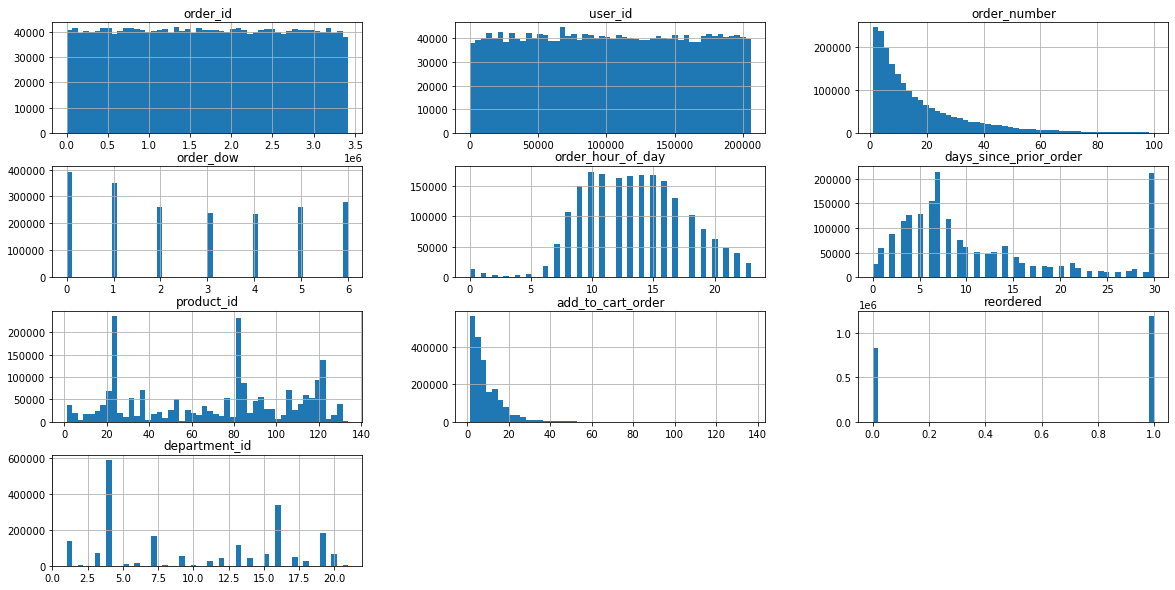

In [13]:
sup.hist(bins=50, figsize=(20, 10))
plt.show()

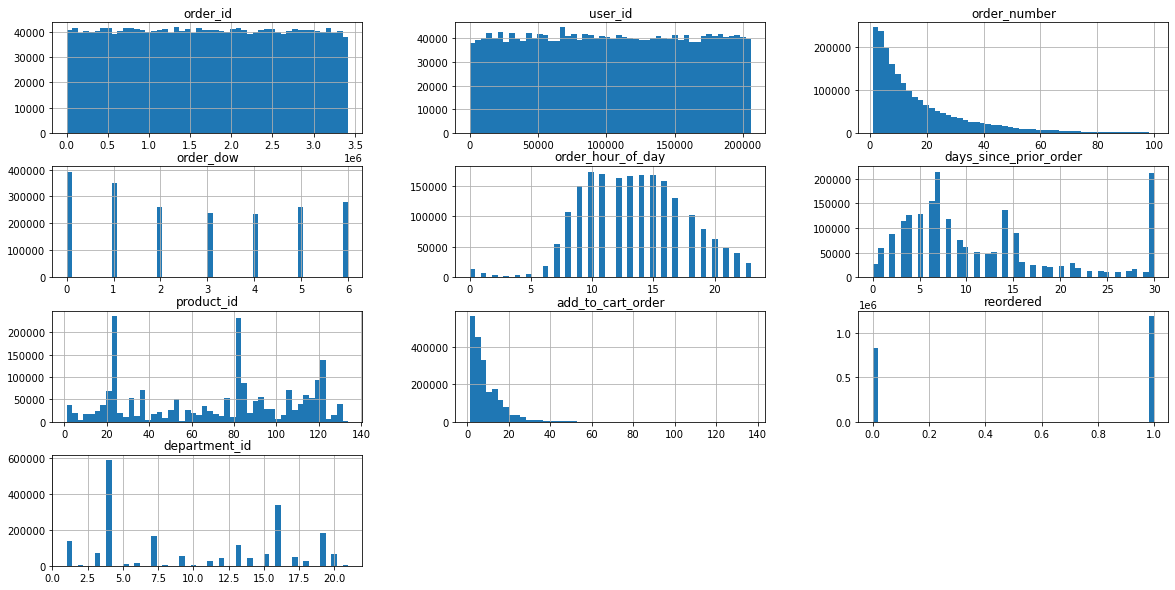

In [14]:
sup_imputed.hist(bins=50, figsize=(20, 10))
plt.show()

In [15]:
sup_imputed.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [16]:
sup_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                float64
 1   user_id                 float64
 2   order_number            float64
 3   order_dow               float64
 4   order_hour_of_day       float64
 5   days_since_prior_order  int64  
 6   product_id              float64
 7   add_to_cart_order       float64
 8   reordered               float64
 9   department_id           float64
 10  department              object 
 11  product_name            object 
dtypes: float64(9), int64(1), object(2)
memory usage: 184.9+ MB


In [17]:
for col in sup_imputed.columns:
    if sup_imputed[col].dtype == 'float64':
        sup_imputed[col] = sup_imputed[col].astype(np.int64)

In [18]:
sup_copy = sup_imputed.copy()

#### Order Id

In [19]:
sup_imputed['order_id'].describe()

count    2.019501e+06
mean     1.707013e+06
std      9.859832e+05
min      1.000000e+01
25%      8.526490e+05
50%      1.705004e+06
75%      2.559031e+06
max      3.421080e+06
Name: order_id, dtype: float64

In [20]:
sup_imputed['order_id'].value_counts()

790903     137
2621625    109
416346     100
1031566     95
1930316     93
          ... 
2616869      1
1043968      1
47105        1
1923284      1
460941       1
Name: order_id, Length: 200000, dtype: int64

#### User Id

In [23]:
sup_imputed['user_id'].describe()

count    2.019501e+06
mean     1.030673e+05
std      5.949117e+04
min      2.000000e+00
25%      5.158400e+04
50%      1.026900e+05
75%      1.546000e+05
max      2.062090e+05
Name: user_id, dtype: float64

In [24]:
sup_imputed['user_id'].value_counts()

176478    460
129928    405
126305    384
201268    347
115495    283
         ... 
124195      1
192874      1
73682       1
118192      1
170728      1
Name: user_id, Length: 105273, dtype: int64

#### Order Number

In [27]:
sup_imputed['order_number'].describe()

count    2.019501e+06
mean     1.715138e+01
std      1.752576e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.400000e+01
max      1.000000e+02
Name: order_number, dtype: float64

In [28]:
sup_imputed['order_number'].value_counts()

1      124342
2      122397
3      120627
4      118573
5      105482
        ...  
97        834
91        826
95        741
99        716
100       493
Name: order_number, Length: 100, dtype: int64

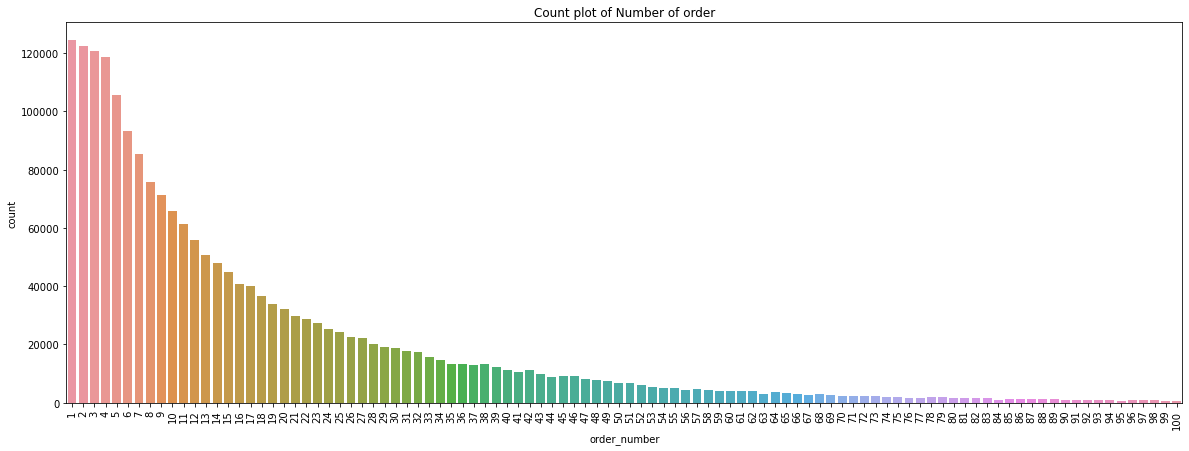

In [31]:
plt.figure(figsize=(20, 7))
sns.countplot(x=sup_imputed['order_number'])
plt.title('Count plot of Number of order')
plt.xticks(rotation=90)
plt.show()

#### Order DOW

In [32]:
sup_imputed['order_dow'].describe()

count    2.019501e+06
mean     2.735367e+00
std      2.093882e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: order_dow, dtype: float64

In [33]:
sup_imputed['order_dow'].value_counts()

0    391831
1    349236
6    280751
5    262157
2    261912
3    238730
4    234884
Name: order_dow, dtype: int64

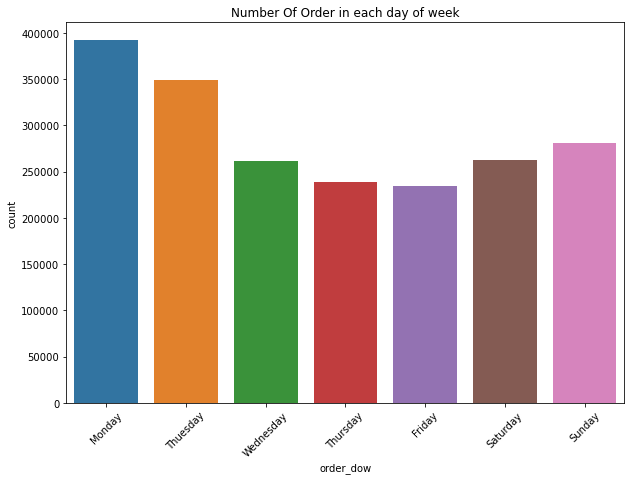

In [36]:
plt.figure(figsize=(10, 7))
sns.countplot(x=sup_imputed['order_dow'])
plt.title('Number Of Order in each day of week')
plt.xticks(np.arange(0, 7), ['Monday', 'Thuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()

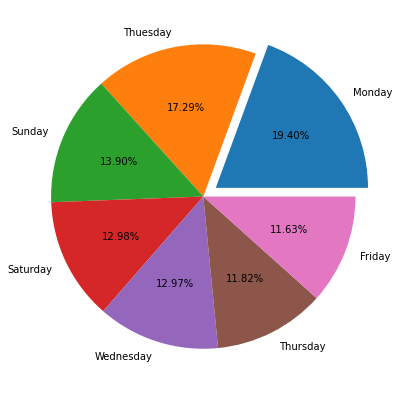

In [37]:
plt.figure(figsize=(10, 7))
labels = ['Monday', 'Thuesday', 'Sunday', 'Saturday', 'Wednesday', 'Thursday', 'Friday']
plt.pie(sup_imputed['order_dow'].value_counts(), explode=[0.10, 0, 0, 0, 0, 0, 0], labels=labels, autopct='%.2f%%')
plt.show()

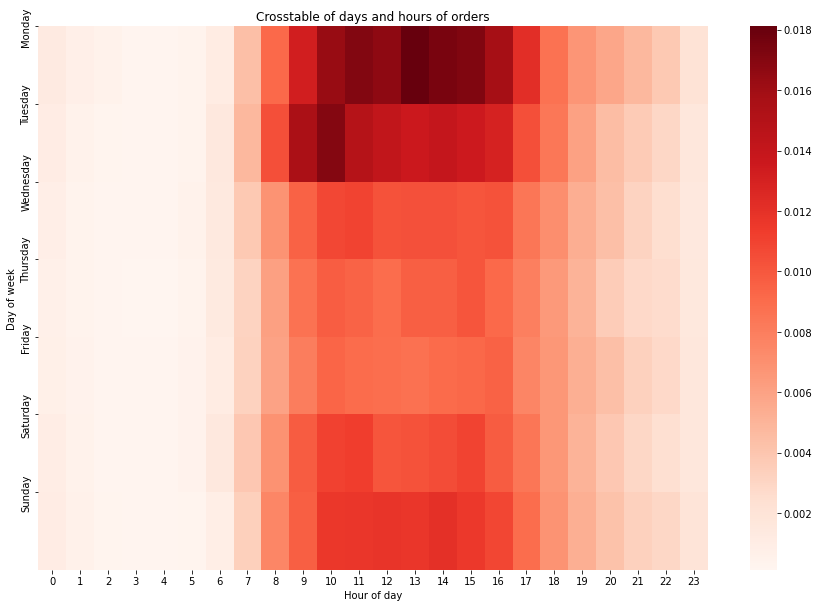

In [75]:
dayhour = sup_imputed.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
dayhour_p = dayhour.pivot('order_dow', 'order_hour_of_day', 'order_number') / sup_imputed.shape[0]

plt.figure(figsize=(15,10))
sns.heatmap(dayhour_p, cmap='Reds')
plt.yticks([0, 1, 2, 3, 4, 5, 6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Hour of day')
plt.ylabel('Day of week')
plt.title('Crosstable of days and hours of orders')
plt.show()

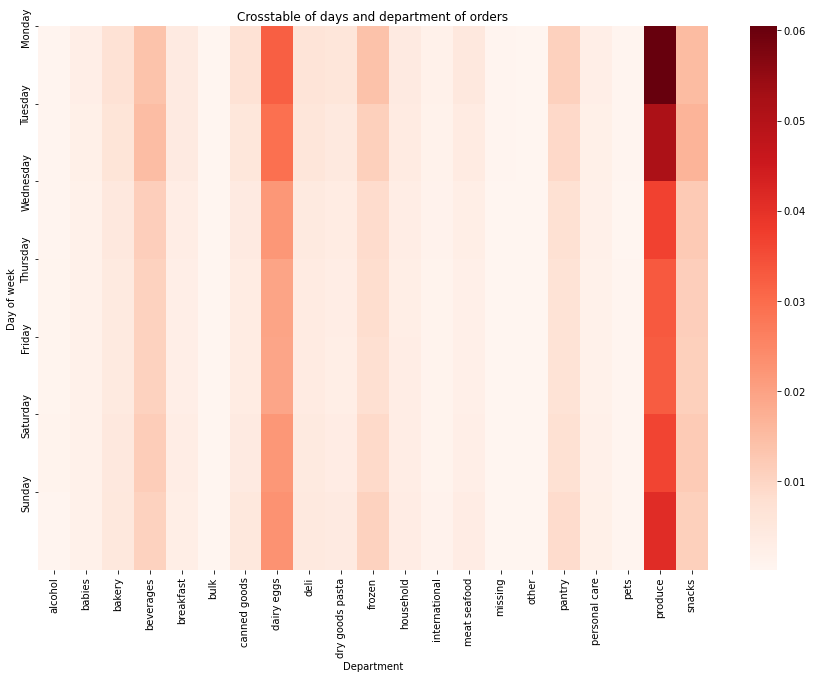

In [116]:
department = sup_imputed.groupby(['order_dow', 'department'])['user_id'].aggregate('count').reset_index().sort_values(by='user_id', ascending=False)
department_p = department.pivot('order_dow', 'department', 'user_id') / sup_imputed.shape[0]


plt.figure(figsize=(15,10))
sns.heatmap(department_p, cmap='Reds')
plt.yticks([0, 1, 2, 3, 4, 5, 6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Department')
plt.ylabel('Day of week')
plt.title('Crosstable of days and department of orders')
plt.show()

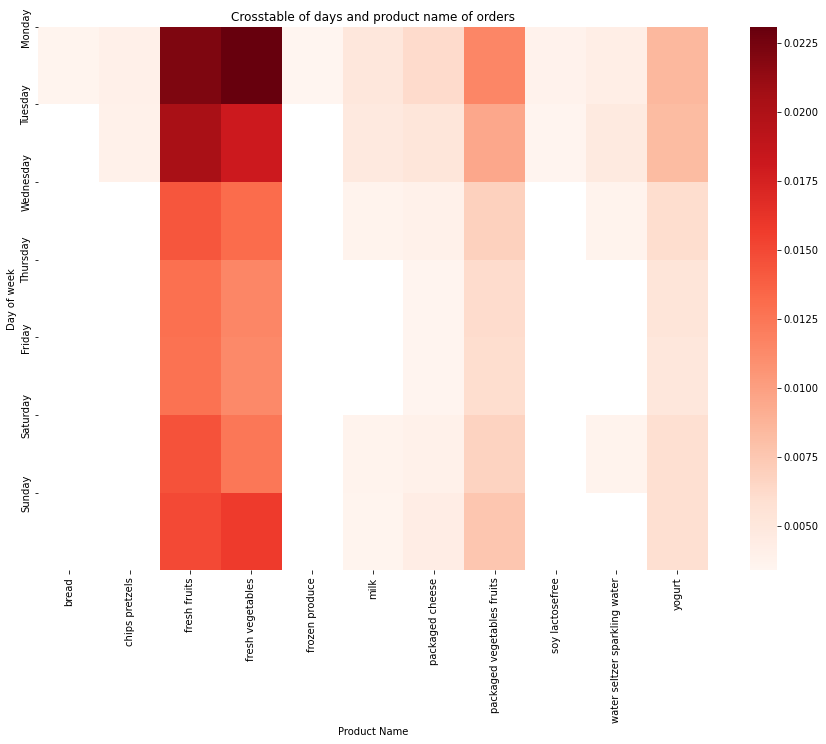

In [122]:
department = sup_imputed.groupby(['order_dow', 'product_name'])['user_id'].count().reset_index().sort_values(by='user_id', ascending=False).head(50)
department_p = department.pivot('order_dow', 'product_name', 'user_id') / sup_imputed.shape[0]


plt.figure(figsize=(15,10))
sns.heatmap(department_p, cmap='Reds')
plt.yticks([0, 1, 2, 3, 4, 5, 6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Product Name')
plt.ylabel('Day of week')
plt.title('Crosstable of days and product name of orders')
plt.show()

#### Order Hour Of Day

In [38]:
sup_imputed['order_hour_of_day'].describe()

count    2.019501e+06
mean     1.343948e+01
std      4.241008e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [39]:
sup_imputed['order_hour_of_day'].value_counts()

10    173306
11    170291
14    167831
15    167157
13    166376
12    163511
16    158247
9     150248
17    129383
8     106754
18    102416
19     78516
20     62110
7      54143
21     48857
22     40762
23     24331
6      18293
0      13481
1       7283
5       5732
2       4210
4       3269
3       2994
Name: order_hour_of_day, dtype: int64

In [40]:
order_hour = pd.DataFrame(sup_imputed.groupby('order_hour_of_day').size()).reset_index()
order_hour = order_hour.rename(columns={0: 'NumberOfOrder'})
order_hour

,order_hour_of_day,NumberOfOrder
0,0,13481
1,1,7283
2,2,4210
3,3,2994
4,4,3269
5,5,5732
6,6,18293
7,7,54143
8,8,106754
9,9,150248


In [41]:
sorted_order_hour = order_hour.sort_values(by=['NumberOfOrder'], ascending=False)
sorted_order_hour

,order_hour_of_day,NumberOfOrder
10,10,173306
11,11,170291
14,14,167831
15,15,167157
13,13,166376
12,12,163511
16,16,158247
9,9,150248
17,17,129383
8,8,106754


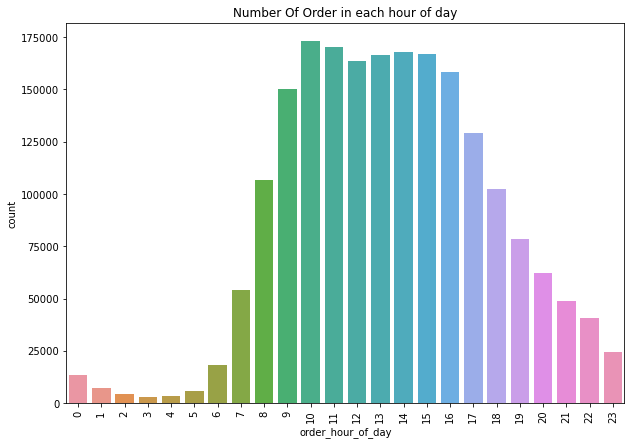

In [42]:
plt.figure(figsize=(10, 7))
sns.countplot(x=sup_imputed['order_hour_of_day'])
plt.title('Number Of Order in each hour of day')
plt.xticks(rotation=90)
plt.show()

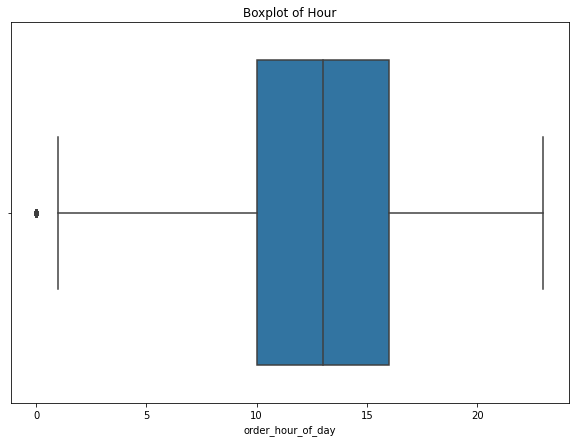

In [86]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=sup_imputed['order_hour_of_day']), plt.title('Boxplot of Hour')
plt.show()

#### Days Since Prior Order

In [43]:
sup_imputed['days_since_prior_order'].describe()

count    2.019501e+06
mean     1.157427e+01
std      8.722533e+00
min      0.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [44]:
sup_imputed['days_since_prior_order'].value_counts()

7     214126
30    210814
6     155685
14    136329
5     129089
4     126250
8     118722
3     113263
15     89489
2      88737
9      75120
10     62073
1      59200
13     52212
11     51476
12     48171
16     31884
21     28359
0      27673
17     24103
20     23234
18     22794
19     20150
22     19950
28     16459
23     13779
24     12833
27     12804
25     11832
29     11590
26     11301
Name: days_since_prior_order, dtype: int64

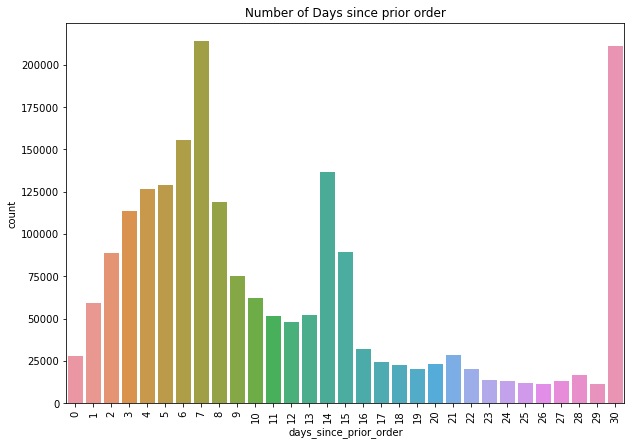

In [47]:
plt.figure(figsize=(10, 7))
sns.countplot(x=sup_imputed['days_since_prior_order'])
plt.title('Number of Days since prior order')
plt.xticks(rotation=90)
plt.show()

#### Add To Cart Order

In [55]:
sup_imputed['add_to_cart_order'].describe()

count    2.019501e+06
mean     8.363173e+00
std      7.150059e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      1.370000e+02
Name: add_to_cart_order, dtype: float64

In [56]:
sup_imputed['add_to_cart_order'].value_counts()

1      200000
2      190134
3      178480
4      165743
5      151983
        ...  
113         1
112         1
111         1
110         1
137         1
Name: add_to_cart_order, Length: 137, dtype: int64

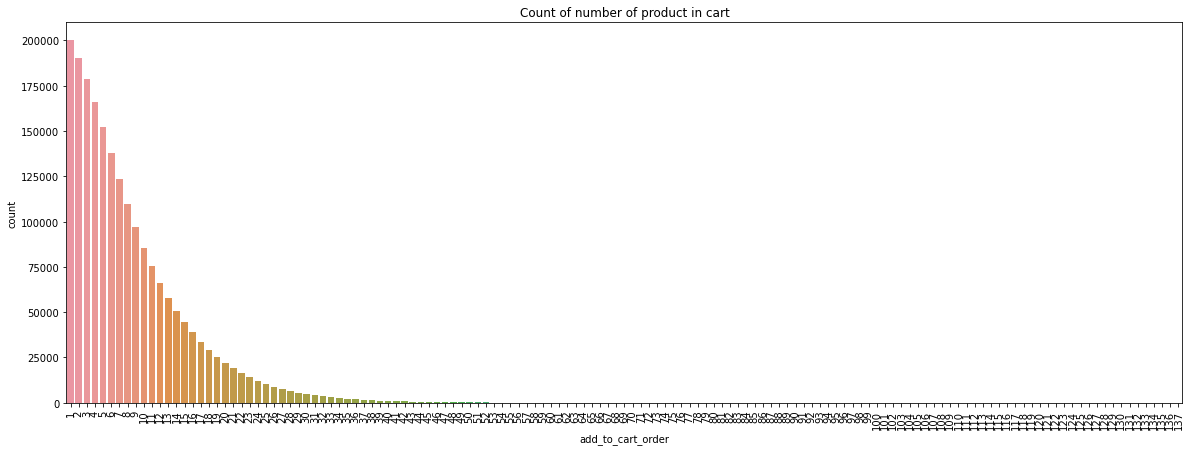

In [60]:
plt.figure(figsize=(20, 7))
sns.countplot(x=sup_imputed['add_to_cart_order'])
plt.title('Count of number of product in cart')
plt.xticks(rotation=90)
plt.show()

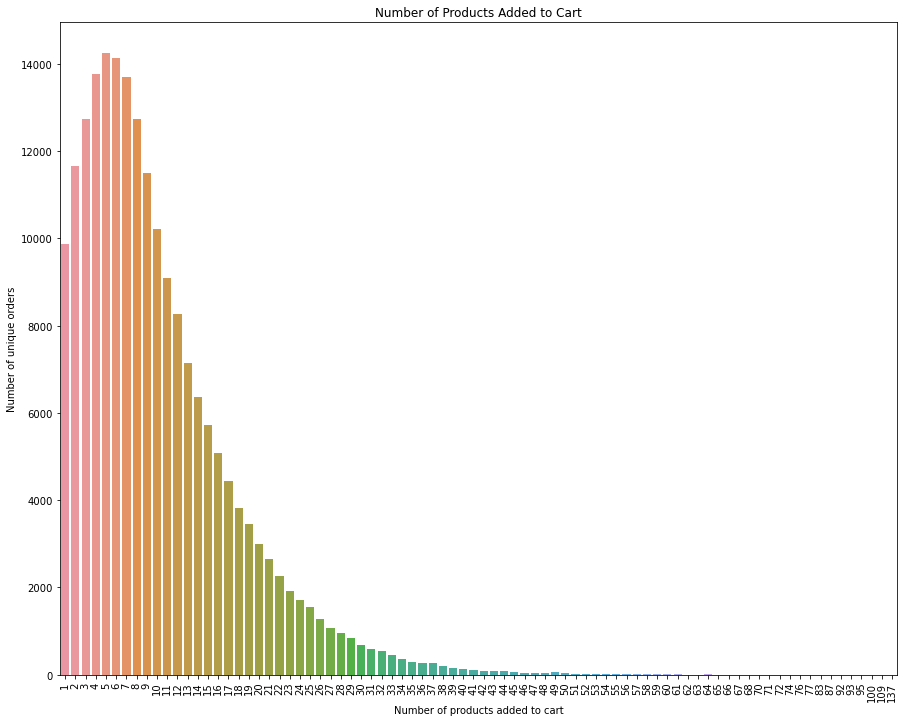

In [72]:
addtocart = sup_imputed.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
addtocart = addtocart.add_to_cart_order.value_counts()

f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=addtocart.index, y=addtocart.values, ax=ax)
plt.xticks(rotation='vertical')
plt.xlabel('Number of products added to cart')
plt.ylabel('Number of unique orders')
plt.title('Number of Products Added to Cart')
plt.show()

#### Reordered

In [61]:
sup_imputed['reordered'].value_counts()

1    1190986
0     828515
Name: reordered, dtype: int64

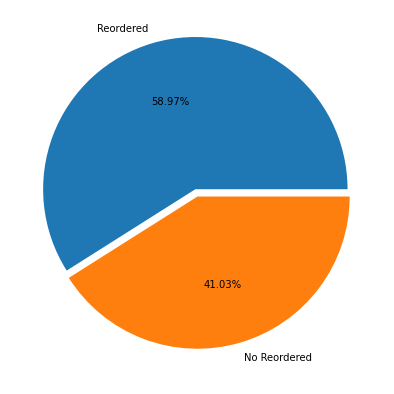

In [63]:
plt.figure(figsize=(10, 7))
labels = ['Reordered', 'No Reordered']
plt.pie(sup_imputed['reordered'].value_counts(), explode=[0.05, 0], labels=labels, autopct='%.2f%%')
plt.show()

#### Department

In [64]:
sup_imputed['department'].describe()

count     2019501
unique         21
top       produce
freq       588996
Name: department, dtype: object

In [65]:
sup_imputed['department'].value_counts()

produce            588996
dairy eggs         336915
snacks             180692
beverages          168126
frozen             139536
pantry             116262
bakery              72983
canned goods        66053
deli                65176
dry goods pasta     54054
household           46446
breakfast           44605
meat seafood        44271
personal care       28134
babies              25940
international       16738
alcohol              9439
pets                 6013
missing              4749
other                2240
bulk                 2133
Name: department, dtype: int64

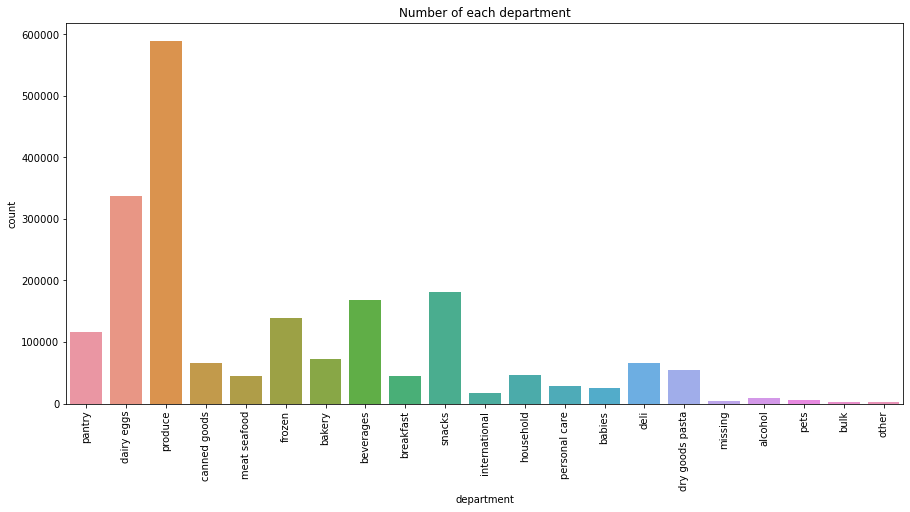

In [67]:
plt.figure(figsize=(15, 7))
sns.countplot(x=sup_imputed['department'])
plt.title('Number of each department')
plt.xticks(rotation=90)
plt.show()

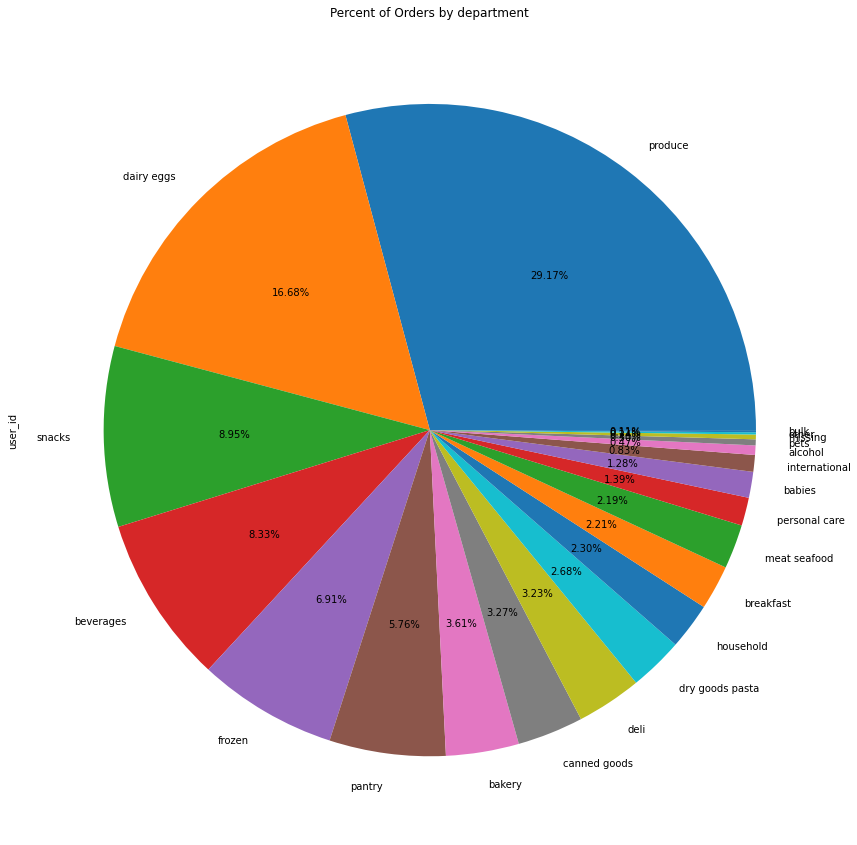

In [76]:
orders_by_dep = sup_imputed.groupby('department')['user_id'].count().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 15))
orders_by_dep.plot(kind='pie', autopct='%1.2f%%', title='Percent of Orders by department', ax=ax)
plt.show()

#### Product Name

In [68]:
sup_imputed['product_name'].describe()

count          2019501
unique             134
top       fresh fruits
freq            226039
Name: product_name, dtype: object

In [69]:
sup_imputed['product_name'].value_counts()

fresh fruits                  226039
fresh vegetables              212611
packaged vegetables fruits    109596
yogurt                         90751
packaged cheese                61502
                               ...  
kitchen supplies                 561
baby bath body care              515
baby accessories                 504
beauty                           387
frozen juice                     279
Name: product_name, Length: 134, dtype: int64

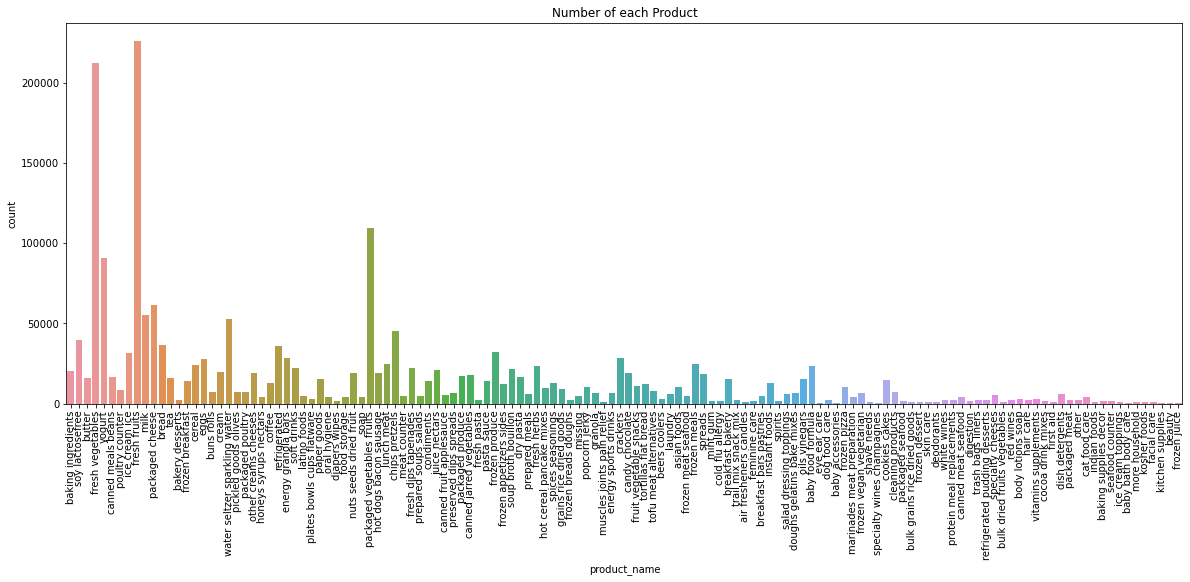

In [71]:
plt.figure(figsize=(20, 7))
sns.countplot(x=sup_imputed['product_name'])
plt.title('Number of each Product')
plt.xticks(rotation=90)
plt.show()

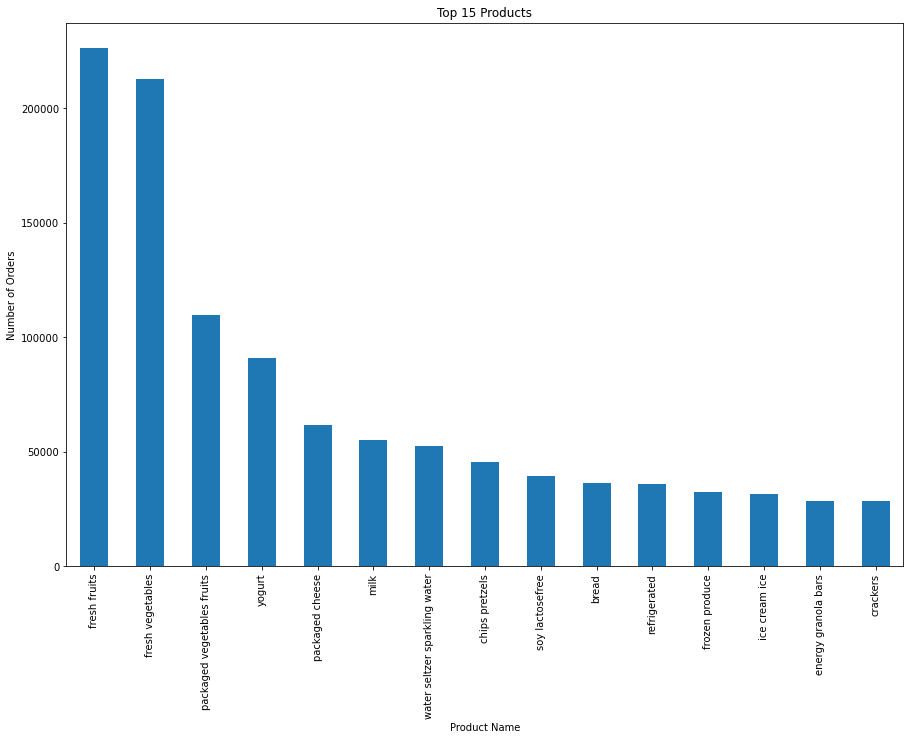

In [77]:
top_products = sup_imputed.groupby('product_name')['user_id'].count().sort_values(ascending=False).head(15)
ax = top_products.plot(kind='bar', title='Top 15 Products', figsize=(15, 10))
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.show()

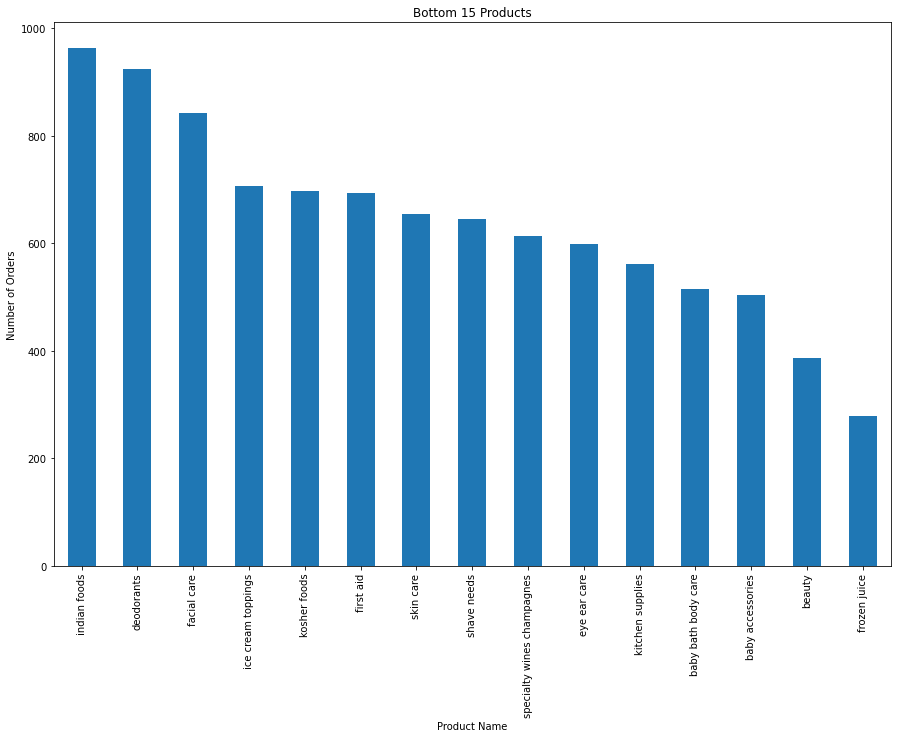

In [78]:
bottom_products = sup_imputed.groupby('product_name')['user_id'].count().sort_values(ascending=False).tail(15)
ax = bottom_products.plot(kind='bar', title='Bottom 15 Products', figsize=(15, 10))
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.show()

In [123]:
def order_part_of_day(order):
    if order in range(6, 12):
        return 'morning'
    elif order in range(12, 18):
        return 'afternoon'
    elif order in range(18, 22):
        return 'evening'
    else:
        return 'night'

In [124]:
sup_imputed['order_part_of_day'] = sup_imputed['order_hour_of_day'].apply(order_part_of_day)
sup_imputed

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_part_of_day
0,2425083,49125,1,2,18,14,17,1,0,13,pantry,baking ingredients,evening
1,2425083,49125,1,2,18,14,91,2,0,16,dairy eggs,soy lactosefree,evening
2,2425083,49125,1,2,18,14,36,3,0,16,dairy eggs,butter,evening
3,2425083,49125,1,2,18,14,83,4,0,4,produce,fresh vegetables,evening
4,2425083,49125,1,2,18,14,83,5,0,4,produce,fresh vegetables,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening


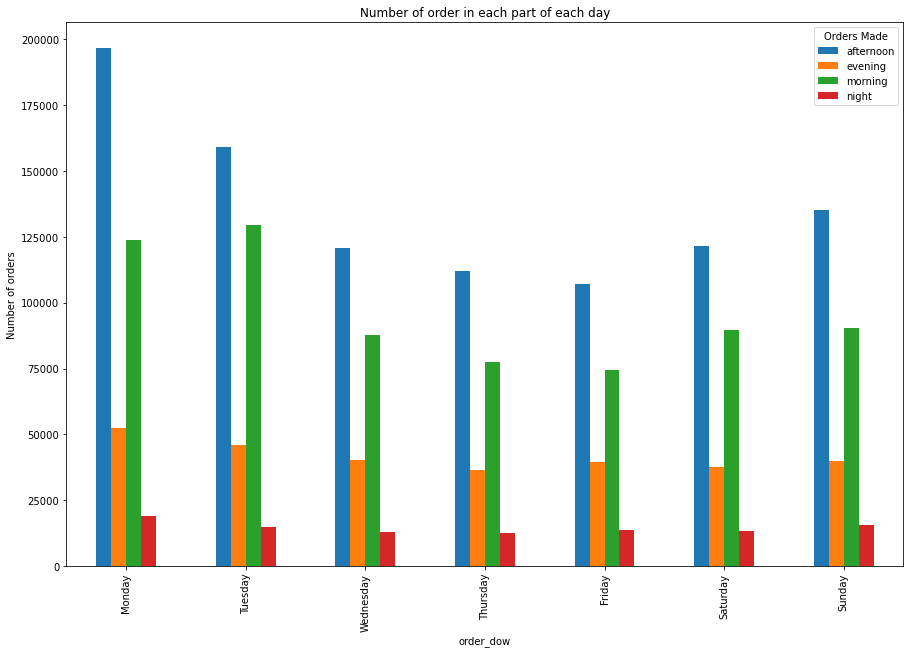

In [125]:
orders_by_day_time = sup_imputed.pivot_table(
    index='order_dow',
    columns='order_part_of_day',
    values='user_id',
    aggfunc='count'
)

ax = orders_by_day_time.plot(kind='bar', figsize=(15, 10),)
ax.set_title('Number of order in each part of each day')
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax.set_ylabel('Number of orders')
ax.legend(title='Orders Made')
plt.show()

In [126]:
def order_number_range(number_order):
    ranges = [(1, 10), (11, 20), (21, 30), (31, 40), (41, 50),(51, 60),(61, 70),(71, 80),(81, 90),(91, 100)]
    for i in ranges:
        if number_order in range(i[0], i[1] + 1):
            return f'{i[0]}-{i[1]}'
    return '+100'

In [127]:
sup_imputed['order_number_range'] = sup_imputed['order_number'].apply(order_number_range)
sup_imputed

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_part_of_day,order_number_range
0,2425083,49125,1,2,18,14,17,1,0,13,pantry,baking ingredients,evening,1-10
1,2425083,49125,1,2,18,14,91,2,0,16,dairy eggs,soy lactosefree,evening,1-10
2,2425083,49125,1,2,18,14,36,3,0,16,dairy eggs,butter,evening,1-10
3,2425083,49125,1,2,18,14,83,4,0,4,produce,fresh vegetables,evening,1-10
4,2425083,49125,1,2,18,14,83,5,0,4,produce,fresh vegetables,evening,1-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening,11-20
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening,41-50
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening,41-50
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening,41-50


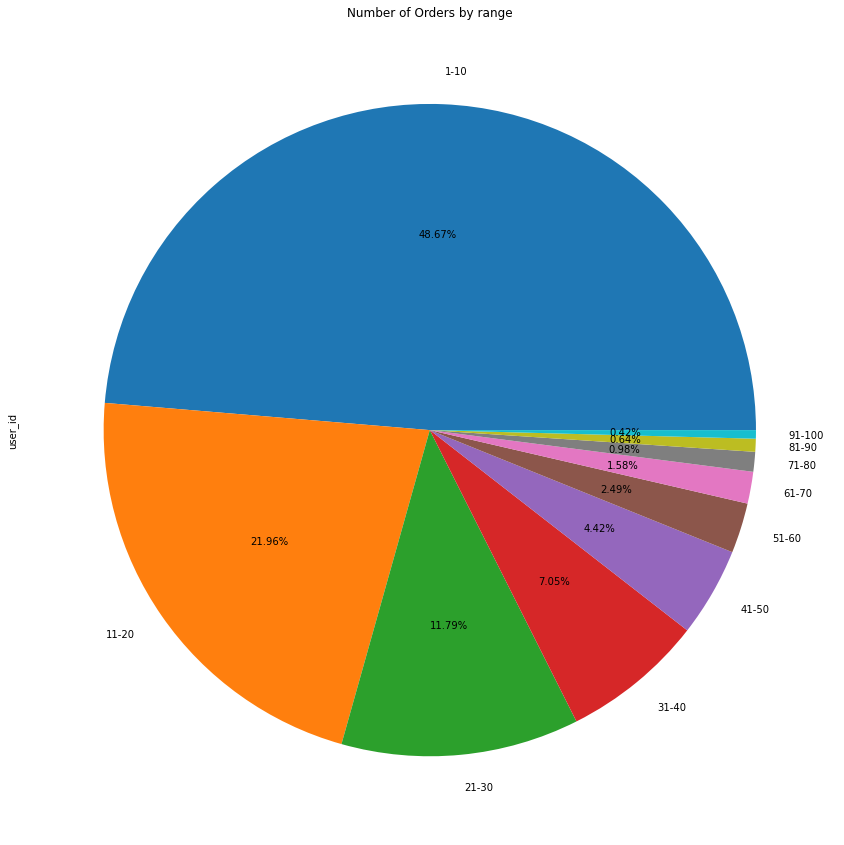

In [128]:
orders_by_range = sup_imputed.groupby('order_number_range')['user_id'].count().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 15))
orders_by_range.plot(kind='pie', autopct='%1.2f%%', title='Number of Orders by range', ax=ax)

plt.show()

In [43]:
group = sup_imputed.groupby(["product_id","product_name","department","order_part_of_day"])["reordered"].aggregate('count').reset_index()
group = group.sort_values(by='reordered', ascending=False)[:20].reset_index()
del group["index"]
group

,product_id,product_name,department,order_part_of_day,reordered
0,24.0,fresh fruits,produce,afternoon,104177
1,83.0,fresh vegetables,produce,afternoon,102115
2,24.0,fresh fruits,produce,morning,77479
3,83.0,fresh vegetables,produce,morning,68634
4,123.0,packaged vegetables fruits,produce,afternoon,51493
5,120.0,yogurt,dairy eggs,afternoon,41484
6,123.0,packaged vegetables fruits,produce,morning,36210
7,24.0,fresh fruits,produce,evening,32628
8,120.0,yogurt,dairy eggs,morning,31412
9,83.0,fresh vegetables,produce,evening,30267


In [145]:
corr_mat = sup_imputed.corr()
corr_mat

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
order_id,1.000000,0.000515,0.004791,0.002015,0.001039,-0.001831,0.000114,-0.003230,0.002207,0.000691
user_id,0.000515,1.000000,-0.003244,-0.001796,-0.002050,0.000053,0.000300,0.001180,-0.001780,0.001475
order_number,0.004791,-0.003244,1.000000,0.013848,-0.038352,-0.370478,0.000227,-0.000380,0.302881,0.001811
order_dow,0.002015,-0.001796,0.013848,1.000000,0.010854,-0.030884,-0.001458,-0.009274,-0.008689,0.003504
order_hour_of_day,0.001039,-0.002050,-0.038352,0.010854,1.000000,0.005699,-0.000077,-0.015119,-0.019492,-0.007886
days_since_prior_order,-0.001831,0.000053,-0.370478,-0.030884,0.005699,1.000000,0.006262,0.051123,-0.155163,0.000361
product_id,0.000114,0.000300,0.000227,-0.001458,-0.000077,0.006262,1.000000,0.008186,0.004256,0.062107
add_to_cart_order,-0.003230,0.001180,-0.000380,-0.009274,-0.015119,0.051123,0.008186,1.000000,-0.133566,0.029746
reordered,0.002207,-0.001780,0.302881,-0.008689,-0.019492,-0.155163,0.004256,-0.133566,1.000000,-0.037645
department_id,0.000691,0.001475,0.001811,0.003504,-0.007886,0.000361,0.062107,0.029746,-0.037645,1.000000


/var/folders/9y/vw5physn1xj4wpb41wh0q6gh0000gn/T/ipykernel_29086/3087650146.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))


<AxesSubplot:>

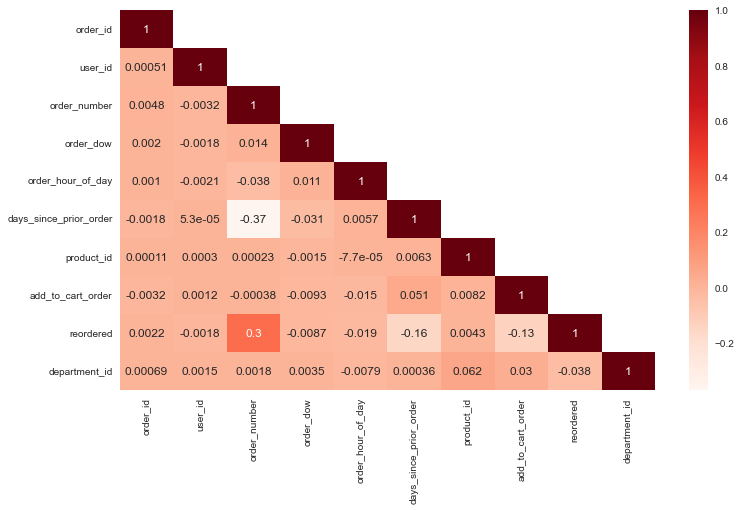

In [146]:
plt.figure(figsize=(12, 7))
corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
sns.heatmap(corr_mat, annot=True, cmap='Reds')

In [61]:
from imblearn.under_sampling import TomekLinks

In [134]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch, MeanShift
from sklearn.decomposition import PCA, KernelPCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [142]:
x_scaled = StandardScaler().fit_transform(sup_copy.iloc[:, :-2])

### K-Means

In [94]:
k_means = KMeans()

In [95]:
y_pred = k_means.fit_predict(x_scaled)

array([2, 2, 2, ..., 6, 6, 4], dtype=int32)

In [101]:
k_means.inertia_

12448793.586525984

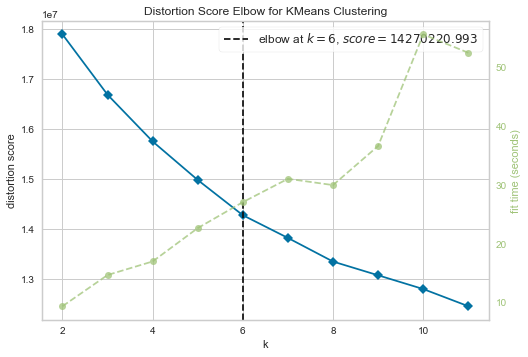

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
visualizer = KElbowVisualizer(k_means, k=(2, 12))
visualizer.fit(x_scaled)
visualizer.show()

In [102]:
k_means = KMeans(n_clusters=6)

In [104]:
y_pred = k_means.fit_predict(x_scaled)

In [105]:
k_means.labels_

array([1, 1, 1, ..., 2, 2, 5], dtype=int32)

##### Using PCA

In [108]:
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_scaled)

Explained variance ratio (first two components): [0.15819485 0.10827508]


<Figure size 576x396 with 0 Axes>

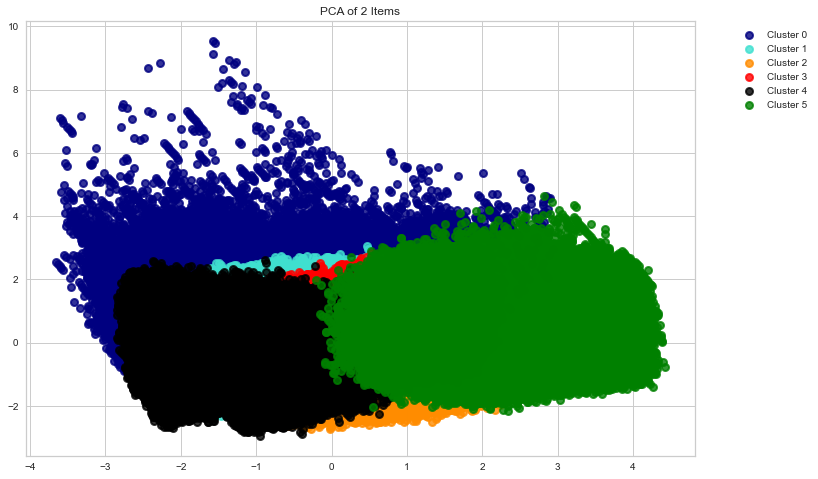

In [113]:
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))
target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4", "Cluster 5"]
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black', 'green']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], target_names):
    plt.scatter(x_pca[y_pred == i, 0], x_pca[y_pred == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [114]:
pca = PCA(n_components=3, random_state=42)
x_pca = pca.fit_transform(x_scaled)

In [116]:
print('Explained variance ratio (first three components): %s' % str(pca.explained_variance_ratio_))

Explained variance ratio (first three components): [0.15819485 0.10827508 0.10231919]


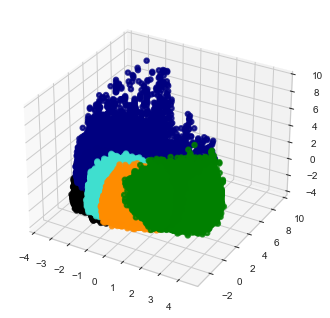

In [121]:
ax = plt.axes(projection='3d')
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], target_names):
    ax.scatter3D(x_pca[y_pred == i, 0], x_pca[y_pred == i, 1], x_pca[y_pred == i, 2], color=color, alpha=.8, lw=lw, label=target_name)

##### Using Kernel PCA

### DBSCAN

In [21]:
db_scan = DBSCAN()

In [27]:
x_scaled_sample = pd.DataFrame(x_scaled).sample(500000)

In [28]:
y_pred = db_scan.fit_predict(x_scaled_sample)

In [35]:
len(set(db_scan.labels_)) - (1 if -1 in db_scan.labels_ else 0)

2162

In [31]:
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_scaled_sample)

Explained variance ratio (first two components): [0.15836946 0.10835441]


<Figure size 576x396 with 0 Axes>

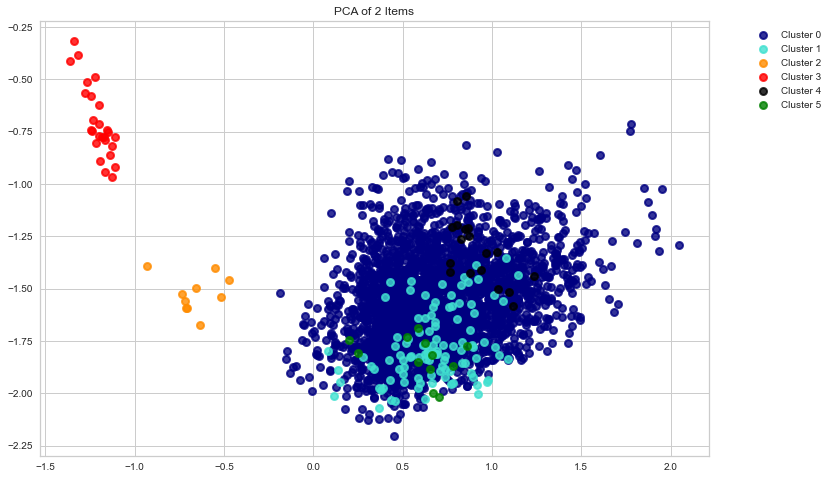

In [32]:
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))
target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4", "Cluster 5"]
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black', 'green']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], target_names):
    plt.scatter(x_pca[y_pred == i, 0], x_pca[y_pred == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

##### Using PCA

##### Using Kernel PCA

### Hierarchical

In [130]:
from hdbscan import HDBSCAN

##### Using PCA

##### Using Kernel PCA

## Conclusion for this problem
Write a conclusion and references which you've used in your homework